In [1]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()
# Get statistics on the dataset.
training_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


Defined the build_model and train_model functions.
Defined the plot_the_model and plot_the_loss_curve functions.
Epoch 1/3
142/142 [==============================] - 1s 1ms/step - loss: 8595.5205 - root_mean_squared_error: 92.7120
Epoch 2/3
142/142 [==============================] - 0s 1ms/step - loss: 7073.4082 - root_mean_squared_error: 84.1036
Epoch 3/3
142/142 [==============================] - 0s 1ms/step - loss: 7061.3545 - root_mean_squared_error: 84.0319

The learned weight for your model is 41.1972
The learned bias for your model is 45.2762



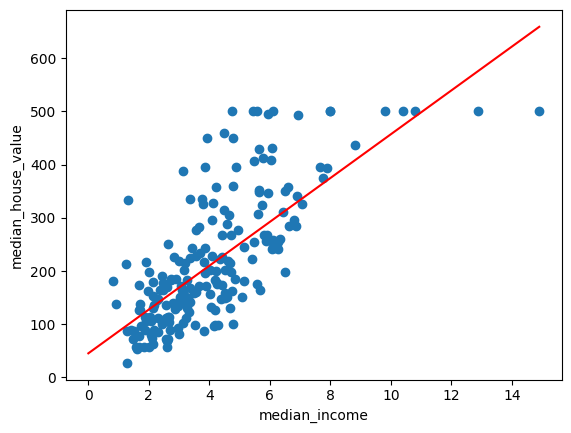

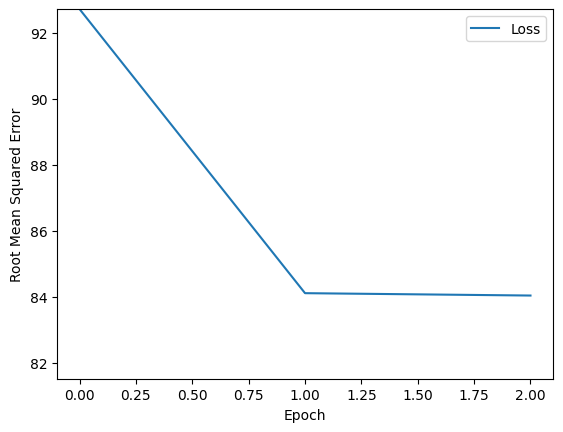

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             134
    4     92             210
    3     69             153
    2     62             132
    3     80             153
    2    295             147
   10    500             448
    5    342             256
    2    118             146
    4    128             219


In [2]:

#@title Define the functions that build and train a model
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer.
    model.add(tf.keras.layers.Dense(units=1,
                                    input_shape=(1,)))

    # Compile the model topography into code that TensorFlow can efficiently
    # execute. Configure training to minimize the model's mean squared error.
    model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model


def train_model(model, df, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # Feed the model the feature and the label.
    # The model will train for the specified number of epochs.

    history = model.fit(x=df[feature],
                        y=df[label],
                        batch_size=batch_size,
                        epochs=epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the error for each epoch.
    hist = pd.DataFrame(history.history)

    # To track the progression of training, we're going to take a snapshot
    # of the model's root mean squared error at each epoch.
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against 200 random training examples."""

    # Label the axes.
    plt.xlabel(feature)
    plt.ylabel(label)

    # Create a scatter plot from 200 random points of the dataset.
    random_examples = training_df.sample(n=200)
    plt.scatter(random_examples[feature], random_examples[label])

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = random_examples[feature].max()
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1[0]], c='r')

    # Render the scatter plot and the red line.
    plt.show()


def plot_the_loss_curve(epochs, rmse):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")
def predict_house_values(n, feature, label):
    """Predict house values based on a feature."""

    batch = training_df[feature][10000:10000 + n]
    predicted_values = my_model.predict_on_batch(x=batch)

    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    print("--------------------------------------")
    for i in range(n):
        print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                       training_df[label][10000 + i],
                                       predicted_values[i][0] ))

# The following variables are the hyperparameters.
learning_rate = 2
epochs = 3
batch_size = 120
# Specify the feature and the label.
my_feature = "median_income"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based
# solely on total_rooms.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)


# Ejercicio 1 :
Mira la tabla anterior. ¿Qué tan cerca está el valor previsto del valor de la etiqueta? En otras palabras, ¿su modelo predice con precisión el valor de la vivienda?

 * Respuesta : podemos ver en las graficas enteriores que no se forma una buena prediccion de los datos, incluso en la tabla de comparacion vemos que hay una gran diferencia entre los datos reales y los predichos


# Ejercicio 2 :
La función tenía solo un poco de poder predictivo. ¿Una característica diferente tendría mayor poder predictivo? Intente usar como característica en lugar de . total_roomspopulationtotal_rooms

Epoch 1/18
8500/8500 [==============================] - 9s 1ms/step - loss: 40197.5039 - root_mean_squared_error: 200.4931
Epoch 2/18
8500/8500 [==============================] - 9s 1ms/step - loss: 19628.9316 - root_mean_squared_error: 140.1033
Epoch 3/18
8500/8500 [==============================] - 8s 953us/step - loss: 19078.6270 - root_mean_squared_error: 138.1254
Epoch 4/18
8500/8500 [==============================] - 8s 950us/step - loss: 18735.5605 - root_mean_squared_error: 136.8779
Epoch 5/18
8500/8500 [==============================] - 8s 965us/step - loss: 18653.9805 - root_mean_squared_error: 136.5796
Epoch 6/18
8500/8500 [==============================] - 9s 1ms/step - loss: 18850.1738 - root_mean_squared_error: 137.2959
Epoch 7/18
8500/8500 [==============================] - 8s 973us/step - loss: 18849.2969 - root_mean_squared_error: 137.2927
Epoch 8/18
8500/8500 [==============================] - 8s 942us/step - loss: 19153.7734 - root_mean_squared_error: 138.3972
Epoch 

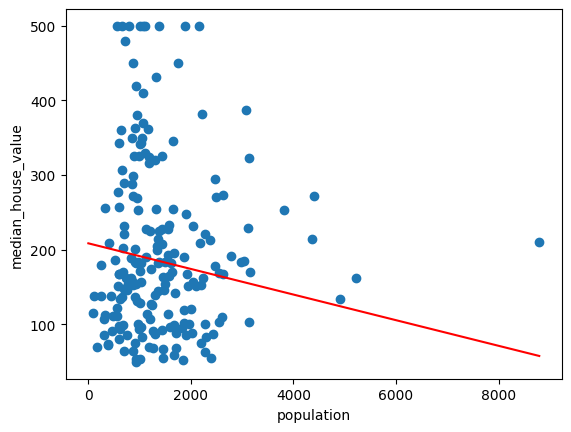

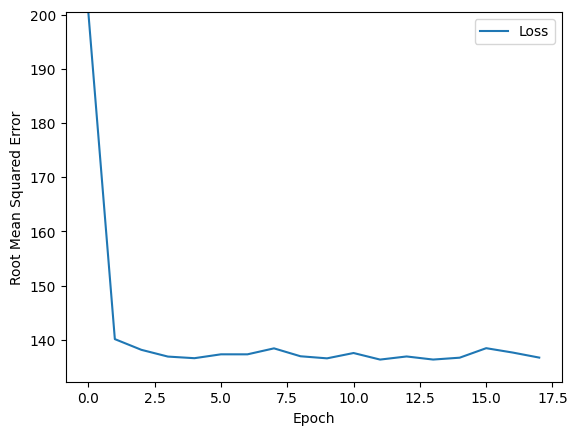

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             186
 1867     92             176
 2191     69             171
 1052     62             190
 1647     80             180
 2312    295             169
 1604    500             181
 1066    342             190
  338    118             203
 1604    128             181


In [3]:
learning_rate = 0.05
epochs = 18
batch_size = 2

# Specify the feature and the label.
my_feature = "population"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based
# solely on total_rooms.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

* Respuesta : vemos que la grafica no llega a converger osea es no determinista por lo que se necesitaria configurar algunas variables o no elegir la poblacion

# Ejercicio 3:
Has determinado eso y no eran características útiles. Es decir, ni el número total de habitaciones en un vecindario ni la población del vecindario predijeron con éxito el precio medio de la vivienda de ese vecindario. Quizás, sin embargo, la proporción de a podría tener algún poder predictivo. Es decir, tal vez la densidad de bloques se relaciona con el valor medio de la vivienda.total_roomspopulationtotal_roomspopulation

Para explorar esta hipótesis, haga lo siguiente:

Cree una característica sintética que tenga una proporción de . (Si eres nuevo en pandas DataFrames, por favor estudia el Tutorial Ultraquick de Pandas DataFrame.)total_roomspopulation
Ajuste los tres hiperparámetros.
Determinar si esta característica sintética produce un valor de pérdida más bajo que cualquiera de las características individuales que intentado anteriormente en este ejercicio.

Epoch 1/300
213/213 [==============================] - 0s 1ms/step - loss: 52944.1914 - root_mean_squared_error: 230.0961
Epoch 2/300
213/213 [==============================] - 0s 1ms/step - loss: 50231.4258 - root_mean_squared_error: 224.1237
Epoch 3/300
213/213 [==============================] - 0s 1ms/step - loss: 47856.9844 - root_mean_squared_error: 218.7624
Epoch 4/300
213/213 [==============================] - 0s 1ms/step - loss: 45708.7969 - root_mean_squared_error: 213.7962
Epoch 5/300
213/213 [==============================] - 0s 1ms/step - loss: 43859.6172 - root_mean_squared_error: 209.4269
Epoch 6/300
213/213 [==============================] - 0s 922us/step - loss: 42256.0312 - root_mean_squared_error: 205.5627
Epoch 7/300
213/213 [==============================] - 0s 979us/step - loss: 40935.9805 - root_mean_squared_error: 202.3264
Epoch 8/300
213/213 [==============================] - 0s 1ms/step - loss: 39732.0195 - root_mean_squared_error: 199.3289
Epoch 9/300
213/213 

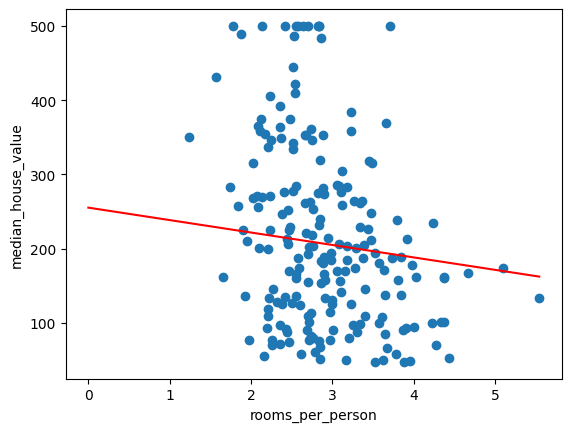

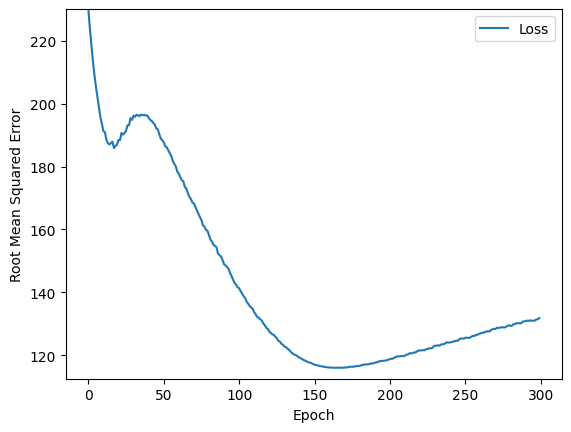

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    3     53             199
    3     92             204
    3     69             209
    2     62             215
    4     80             189
    2    295             225
    4    500             189
    3    342             213
    2    118             218
    3    128             212
    3    187             200
    2     80             226
    2    112             218
    3     95             211
    2     69             219


In [5]:
training_df["rooms_per_person"]= training_df["population"]/training_df["households"]
my_feature="rooms_per_person"

learning_rate=0.01
epochs=300
batch_size=80
my_model=build_model(learning_rate)
weight,bias,epochs,mae=train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs,mae)
predict_house_values(15,my_feature,my_label)

*Respuesta : Vemos que aun relacionando dos variables no se llega a una convergencia , por lo que tenemos que encontrar otras relaciones en variables por lo que aplicaremos una funcion que nos da la relacion entre las variables

In [5]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


In [ ]:
training_df["rooms_per_person"]= training_df["total_rooms"]/training_df["population"]
my_feature="rooms_per_person"

learning_rate=0.1
epochs=100
batch_size=50
my_model=build_model(learning_rate)
weight,bias,epochs,mae=train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs,mae)
predict_house_values(15,my_feature,my_label)